In [71]:
!pip install openpyxl

In [72]:
!pip install matplotlib

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [74]:
# Создадим на базе случайно сгенерированых данных!
np.random.seed(1)
n=100
dates = pd.date_range(start='2050-01-01', periods=n, freq='D') # freq -> частотав в один день
products = np.random.choice(['Tablet','Camera','Phone','Microphone','Keyboard'],n)
prices=np.round(np.random.uniform(50.0,200.0,n),2)
quantities=np.random.randint(1,15,n)
data = {
    'Date': dates,
    'Product':products,
    'Price':prices,
    'Quantity':quantities
}
data

{'Date': DatetimeIndex(['2050-01-01', '2050-01-02', '2050-01-03', '2050-01-04',
                '2050-01-05', '2050-01-06', '2050-01-07', '2050-01-08',
                '2050-01-09', '2050-01-10', '2050-01-11', '2050-01-12',
                '2050-01-13', '2050-01-14', '2050-01-15', '2050-01-16',
                '2050-01-17', '2050-01-18', '2050-01-19', '2050-01-20',
                '2050-01-21', '2050-01-22', '2050-01-23', '2050-01-24',
                '2050-01-25', '2050-01-26', '2050-01-27', '2050-01-28',
                '2050-01-29', '2050-01-30', '2050-01-31', '2050-02-01',
                '2050-02-02', '2050-02-03', '2050-02-04', '2050-02-05',
                '2050-02-06', '2050-02-07', '2050-02-08', '2050-02-09',
                '2050-02-10', '2050-02-11', '2050-02-12', '2050-02-13',
                '2050-02-14', '2050-02-15', '2050-02-16', '2050-02-17',
                '2050-02-18', '2050-02-19', '2050-02-20', '2050-02-21',
                '2050-02-22', '2050-02-23', '2050-02-24'

## Create Csv

In [75]:
df = pd.DataFrame(data)
df.head()

,Date,Product,Price,Quantity
0,2050-01-01,Microphone,147.16,7
1,2050-01-02,Keyboard,103.09,10
2,2050-01-03,Tablet,164.48,7
3,2050-01-04,Camera,103.48,1
4,2050-01-05,Microphone,162.92,1


In [76]:
df.dtypes

Date        datetime64[ns]
Product             object
Price              float64
Quantity             int32
dtype: object

In [77]:
df.to_csv(path_or_buf='random_sales.csv', index=False) #

## Read csv

In [78]:
df_read = pd.read_csv(filepath_or_buffer='random_sales.csv', parse_dates=['Date'],date_format='%Y-%m-%d') 
# Date без этого параметра как object date_format -> дает понять в каком формате даты в файле

In [79]:
df_read.head

<bound method NDFrame.head of          Date     Product   Price  Quantity
0  2050-01-01  Microphone  147.16         7
1  2050-01-02    Keyboard  103.09        10
2  2050-01-03      Tablet  164.48         7
3  2050-01-04      Camera  103.48         1
4  2050-01-05  Microphone  162.92         1
..        ...         ...     ...       ...
95 2050-04-06       Phone  119.32         8
96 2050-04-07      Tablet   69.84         7
97 2050-04-08       Phone  164.64         3
98 2050-04-09    Keyboard   81.91        11
99 2050-04-10      Camera   61.14        13

[100 rows x 4 columns]>

In [80]:
df_read.dtypes    

Date        datetime64[ns]
Product             object
Price              float64
Quantity             int64
dtype: object

## Save to Json, Excel

In [81]:
df.to_excel(excel_writer='sales_to_xlsx.xlsx') 

In [82]:
df.to_json(path_or_buf='sales_to_json.json')

In [83]:
# И еще много форматов сохранения

In [84]:
df.shape

(100, 4)

In [85]:
df.describe()

,Date,Price,Quantity
count,100,100.000000,100.000000
mean,2050-02-19 12:00:00,117.319000,7.790000
min,2050-01-01 00:00:00,51.350000,1.000000
25%,2050-01-25 18:00:00,81.130000,5.000000
50%,2050-02-19 12:00:00,114.105000,8.000000
75%,2050-03-16 06:00:00,161.207500,11.250000
max,2050-04-10 00:00:00,197.260000,14.000000
std,NaN,42.469805,4.030928


In [86]:
df.describe().round(2)

,Date,Price,Quantity
count,100,100.00,100.00
mean,2050-02-19 12:00:00,117.32,7.79
min,2050-01-01 00:00:00,51.35,1.00
25%,2050-01-25 18:00:00,81.13,5.00
50%,2050-02-19 12:00:00,114.10,8.00
75%,2050-03-16 06:00:00,161.21,11.25
max,2050-04-10 00:00:00,197.26,14.00
std,NaN,42.47,4.03


In [87]:
df.values[:5]

array([[Timestamp('2050-01-01 00:00:00'), 'Microphone', 147.16, 7],
       [Timestamp('2050-01-02 00:00:00'), 'Keyboard', 103.09, 10],
       [Timestamp('2050-01-03 00:00:00'), 'Tablet', 164.48, 7],
       [Timestamp('2050-01-04 00:00:00'), 'Camera', 103.48, 1],
       [Timestamp('2050-01-05 00:00:00'), 'Microphone', 162.92, 1]],
      dtype=object)

In [88]:
# Общее количество по каждому товару
df.groupby(by='Product')

In [89]:
df.groupby(by='Product')['Quantity']

In [93]:
product_sales = df.groupby(by='Product')['Quantity'].sum()
product_sales

Product
Camera        186
Keyboard      173
Microphone    106
Phone         124
Tablet        190
Name: Quantity, dtype: int32

In [94]:
df.groupby(by='Product')['Price'].sum()

Product
Camera        2916.87
Keyboard      2659.04
Microphone    2200.29
Phone         1852.07
Tablet        2103.63
Name: Price, dtype: float64

In [107]:
avarage_prices = df.groupby(by='Product')['Price'].mean().round(2)
avarage_prices

Product
Camera        121.54
Keyboard      115.61
Microphone    129.43
Phone         123.47
Tablet        100.17
Name: Price, dtype: float64

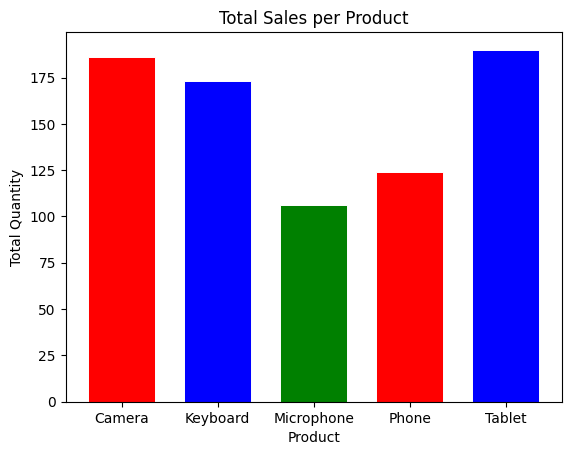

In [108]:
plt.bar(product_sales.index,product_sales.values,color=['red','blue','green'], edgecolor="white", linewidth=0.7,width=0.7)
plt.title('Total Sales per Product')
plt.xlabel('Product')
plt.ylabel('Total Quantity')
plt.show()

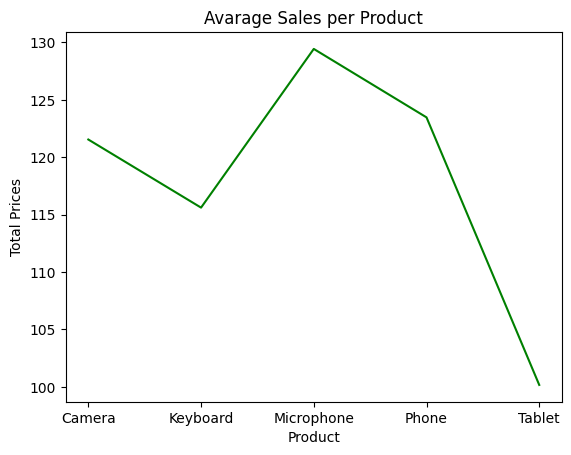

In [111]:
plt.plot(avarage_prices.index,avarage_prices.values,color='green')
plt.title('Avarage Sales per Product')
plt.xlabel('Product')
plt.ylabel('Total Prices')
plt.show()